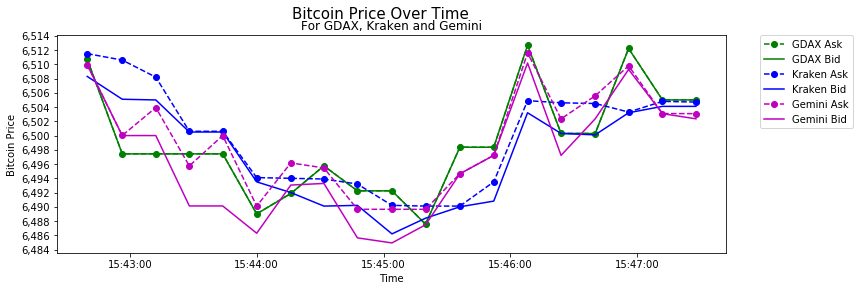

In [94]:

#  Using data from APIs and Python Arrays.
#  Without using Numpy.


import json
import requests
import datetime
import time
import matplotlib.pyplot as plt
import matplotlib as mpl

sleep_time = 15

times = []
gdax_ask = []
gdax_bid = []
kraken_ask = []
kraken_bid = []
gemini_ask = []
gemini_bid = []


for x in range(1, 20):
    times.append(datetime.datetime.now())
    
    gdax = requests.get('https://api.gdax.com/products/BTC-USD/ticker').json()
    gdax_ask.append(gdax['ask'])
    gdax_bid.append(gdax['bid'])
    
    kraken = requests.get('https://api.kraken.com/0/public/Ticker?pair=XXBTZUSD').json()
    kraken_ask.append(kraken['result']['XXBTZUSD']['a'][0])
    kraken_bid.append(kraken['result']['XXBTZUSD']['b'][0])
    
    gemini = requests.get('https://api.gemini.com/v1/pubticker/btcusd').json()
    gemini_ask.append(gemini['ask'])
    gemini_bid.append(gemini['bid'])
    
    time.sleep(sleep_time)
    
plt.figure(figsize=(12,4))
plt.gca().xaxis.set_major_formatter(mpl.dates.DateFormatter('%H:%M:%S'))
plt.gca().yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.gca().yaxis.set_major_locator(mpl.ticker.MultipleLocator(2))

plt.suptitle('Bitcoin Price Over Time', fontsize=15)
plt.title('For GDAX, Kraken and Gemini')
plt.xlabel('Time')
plt.ylabel('Bitcoin Price')

plt.plot(times, gdax_ask, 'og--', label='GDAX Ask')
plt.plot(times, gdax_bid, 'g-', label='GDAX Bid')
plt.plot(times, kraken_ask, 'ob--', label='Kraken Ask')
plt.plot(times, kraken_bid, 'b', label='Kraken Bid')
plt.plot(times, gemini_ask, 'om--', label='Gemini Ask')
plt.plot(times, gemini_bid, 'm', label='Gemini Bid')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

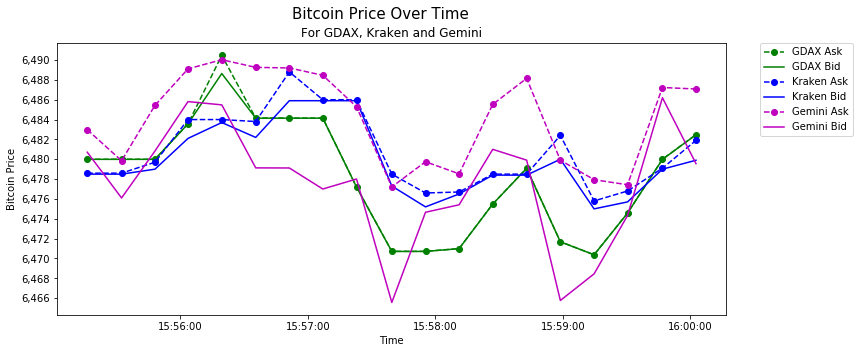

In [91]:

#  Using data from APIs and Python Arrays.
#  Without using Numpy, using Classes

import json
import requests
import datetime
import time

import matplotlib.pyplot as plt
import matplotlib as mpl

sleep_time = 15

class exchange(object):
    def __init__(self, exchange='', api_address=''):
        self.exchange = exchange
        self.api_address = api_address
        self.times = []
        self.asks = []
        self.bids = []
        
    def add_latest_prices(self):
        self.times.append(datetime.datetime.now())
        my_json = requests.get(self.api_address).json()
        if (self.exchange.lower() == "gdax"):
            self.asks.append(my_json['ask'])
            self.bids.append(my_json['bid'])
        elif (self.exchange.lower() == "kraken"):
            self.asks.append(my_json['result']['XXBTZUSD']['a'][0])
            self.bids.append(my_json['result']['XXBTZUSD']['b'][0])
        elif (self.exchange.lower() == "gemini"):
            self.asks.append(my_json['ask'])
            self.bids.append(my_json['bid'])
            
    def show_chart(self):
        plt.plot(self.times, self.asks)
        plt.plot(self.times, self.bids)
        plt.show()
            
    def times(self):
        return self.times
    
    def asks(self):
        return self.asks
    
    def bids(self):
        return self.bids

        
# Initialize exchanges
gdax = exchange(exchange='gdax', api_address='https://api.gdax.com/products/BTC-USD/ticker')
kraken = exchange(exchange='kraken', api_address='https://api.kraken.com/0/public/Ticker?pair=XXBTZUSD')
gemini = exchange(exchange='gemini', api_address='https://api.gemini.com/v1/pubticker/btcusd')

for x in range(1, 20):
    gdax.add_latest_prices()
    kraken.add_latest_prices()
    gemini.add_latest_prices()
    time.sleep(sleep_time)


plt.figure(figsize=(12,5))
plt.gca().xaxis.set_major_formatter(mpl.dates.DateFormatter('%H:%M:%S'))
plt.gca().yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.gca().yaxis.set_major_locator(mpl.ticker.MultipleLocator(2))

plt.xlabel('Time')
plt.ylabel('Bitcoin Price')
plt.suptitle('Bitcoin Price Over Time', fontsize=15)
plt.title('For GDAX, Kraken and Gemini')

plt.plot(gdax.times, gdax.asks, 'og--', label='GDAX Ask')
plt.plot(gdax.times, gdax.bids, 'g-', label='GDAX Bid')
plt.plot(gdax.times, kraken.asks, 'ob--', label='Kraken Ask')
plt.plot(gdax.times, kraken.bids, 'b', label='Kraken Bid')
plt.plot(gdax.times, gemini.asks, 'om--', label='Gemini Ask')
plt.plot(gdax.times, gemini.bids, 'm', label='Gemini Bid')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

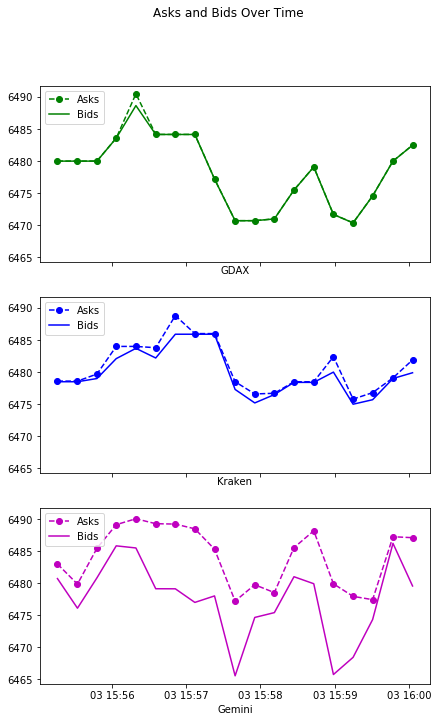

In [96]:

#  More charts using the classes above

f, ax = plt.subplots(3, sharex=True, sharey=True, figsize=(7,11))
f.suptitle('Asks and Bids Over Time')

ax[0].plot(gdax.times, gdax.asks, 'og--', label='Asks')
ax[0].plot(gdax.times, gdax.bids, 'g-', label='Bids')
ax[0].set_xlabel('GDAX')
ax[0].legend(loc=2)

ax[1].plot(gdax.times, kraken.asks, 'ob--', label='Asks')
ax[1].plot(gdax.times, kraken.bids, 'b-', label='Bids')
ax[1].set_xlabel('Kraken')
ax[1].legend(loc=2)

ax[2].plot(gdax.times, gemini.asks, 'om--', label='Asks')
ax[2].plot(gdax.times, gemini.bids, 'm-', label='Bids')
ax[2].set_xlabel('Gemini')
ax[2].legend(loc=2)


             Open    High     Low  Close      Volume  Ex-Dividend  \
Date                                                                
2016-01-04  42.34  42.500  41.965  42.40  16084145.0          0.0   
2016-01-05  42.31  42.625  42.170  42.55  15769463.0          0.0   
2016-01-06  42.20  42.510  42.040  42.32  16245132.0          0.0   

            Split Ratio  Adj. Open  Adj. High   Adj. Low  Adj. Close  \
Date                                                                   
2016-01-04          1.0  39.990337  40.141458  39.636148   40.047007   
2016-01-05          1.0  39.962002  40.259521  39.829771   40.188683   
2016-01-06          1.0  39.858106  40.150903  39.706985   39.971447   

            Adj. Volume  
Date                     
2016-01-04   16084145.0  
2016-01-05   15769463.0  
2016-01-06   16245132.0  


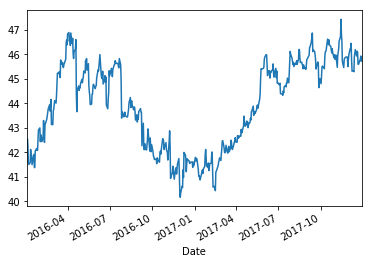

In [97]:


with open('../Keys/quandl.key', 'r') as f:
    key = f.readline().strip()
    
from IPython.core.display import display, HTML

import matplotlib.pyplot as plt
import quandl
data = quandl.get("WIKI/KO", start_date="2016-01-01", end_date="2018-01-01", api_key=key)
data.Close.plot()
print (data[0:3])
plt.show()